<a href="https://colab.research.google.com/github/vrnv1v2/VARUN_ML_PROJECTS/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
from keras.datasets import mnist

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape[0] # 60,000 images each 28*28 pixels


60000

In [40]:
X_train[0] # Note that brightness is from 0 to 256 It can be scaled 0 to 1 with same meaning

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

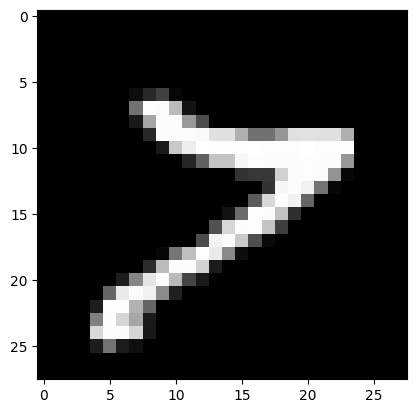

In [41]:
r= np.random.randint(0, 60000)
plt.imshow(X_train[r],cmap='gray')

In [42]:
num_classes = 10

# Assuming y_train and y_test are the labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.Dropout(0.3),layers.Dense(128,activation='relu'),layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Use softmax activation
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=256, epochs=11)
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(train_loss, train_acc)
print("\n")
print(test_loss,test_acc)

Epoch 1/11
235/235 [==============================] - 2s 7ms/step - loss: 0.6294 - accuracy: 0.7989
Epoch 2/11
235/235 [==============================] - 1s 5ms/step - loss: 0.2523 - accuracy: 0.9266
Epoch 3/11
235/235 [==============================] - 1s 5ms/step - loss: 0.1904 - accuracy: 0.9448
Epoch 4/11
235/235 [==============================] - 1s 5ms/step - loss: 0.1604 - accuracy: 0.9525
Epoch 5/11
235/235 [==============================] - 1s 5ms/step - loss: 0.1412 - accuracy: 0.9585
Epoch 6/11
235/235 [==============================] - 1s 5ms/step - loss: 0.1244 - accuracy: 0.9630
Epoch 7/11
235/235 [==============================] - 1s 5ms/step - loss: 0.1145 - accuracy: 0.9656
Epoch 8/11
235/235 [==============================] - 1s 6ms/step - loss: 0.1088 - accuracy: 0.9685
Epoch 9/11
235/235 [==============================] - 2s 8ms/step - loss: 0.1009 - accuracy: 0.9697
Epoch 10/11
235/235 [==============================] - 1s 6ms/step - loss: 0.0963 - accuracy: 0.9703

In [44]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1) # y_pred has probability class wise for each image so from each one extract the maximum value is np.argmax

313/313 [==============================] - 0s 1ms/step


In [46]:
y_pred_classes.shape

(10000,)

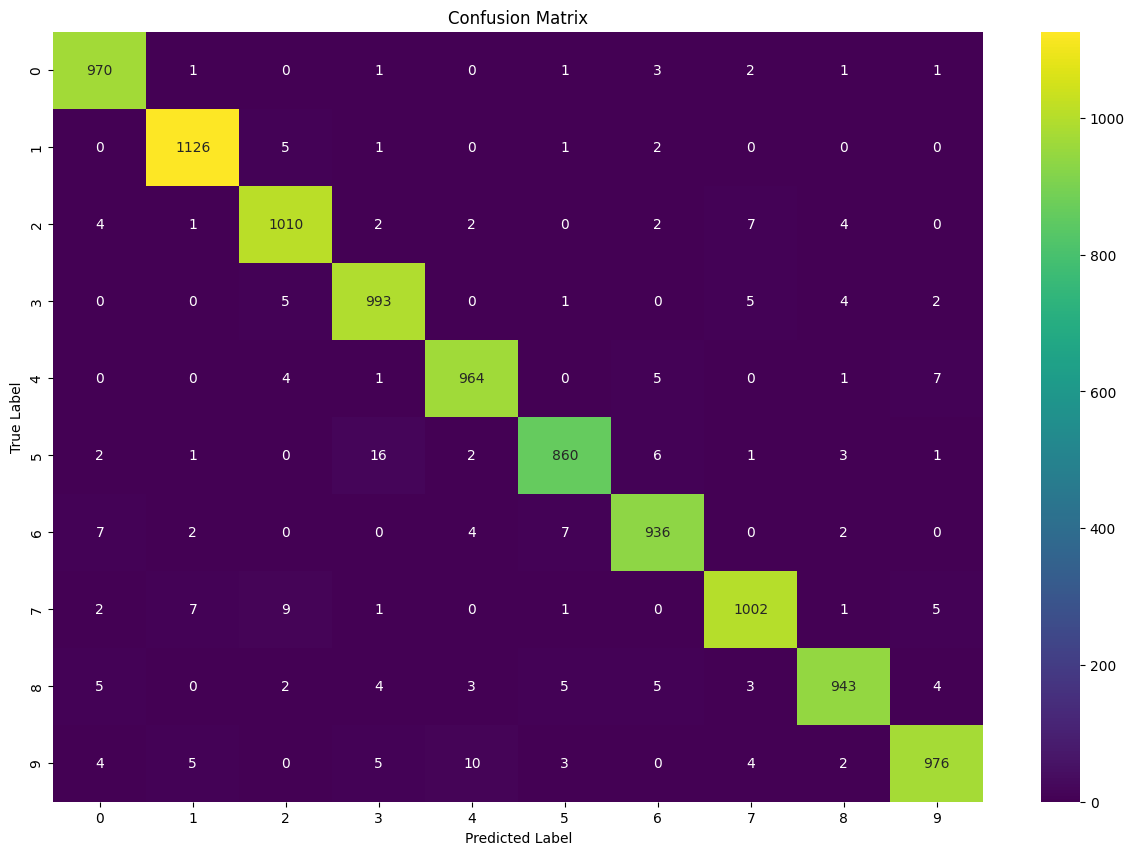

In [48]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");